# The cells 3D reconstruction

This notebook demonstrates the process of cells 3D reconstruction based on whole body 3D point cloud model. This is done in the following five steps.
1. Constituted cellular mesh model based on 3D point cloud model;
2. Construct cellular voxel model based on the mesh model;
3. Save the models as vtk file.

### Packages

In [6]:
import os
import spateo as st
import anndata as ad
import numpy as np

### Data source

In [7]:
adata = ad.read("/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/5_annotation/E8-10_b_all_anno_scsq.h5ad")

data_folder="/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/6_three_dims_reconstruction/E8-10_b_all_anno_scsq/2_reconstruct_tissues/mesh"
pc = st.tl.tdr.read_model(filename=os.path.join(data_folder, "CNS primordium_pc_model.vtk"))
########################################################################################################################
save_folder = r"/media/yao/Yao/Projects/Project_spateo/Data/E8-10_b_sample/6_three_dims_reconstruction"
save_cellbin_tdr_folder = os.path.join(save_folder, r"E8-10_b_all_anno_scsq")
save_cellbin_tdr_3_folder = os.path.join(save_cellbin_tdr_folder, r"3_reconstruct_cells_model")
save_cellbin_tdr_mesh_folder = os.path.join(save_cellbin_tdr_3_folder, r"mesh")
save_cellbin_tdr_image_folder = os.path.join(save_cellbin_tdr_3_folder, r"image")

for folder in [save_folder, save_cellbin_tdr_folder, save_cellbin_tdr_3_folder, save_cellbin_tdr_mesh_folder, save_cellbin_tdr_image_folder]:
    if not os.path.exists(folder):
        os.mkdir(folder)

### Constituted cellular mesh model based on 3D point cloud model

#### Obtain 2D cell area

In [19]:
# Obtain 2D cell area
index = pc.point_data["obs_index"].tolist()
area = adata[index, :].obs["area"].values
st.tl.tdr.add_model_labels(model=pc, labels=area, key_added="area", where="point_data", colormap="hot_r", alphamap=.8, inplace=True)
cell_size = pow(pc.point_data["area"], 1/2)

#### Create spherical cell mesh models

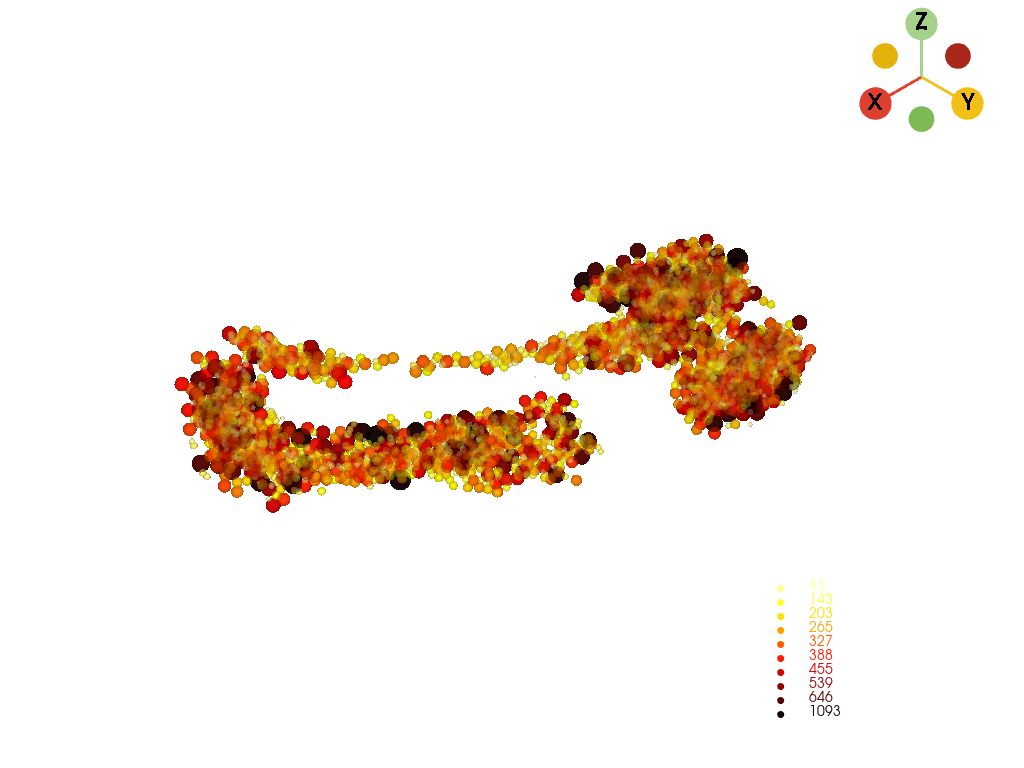

([(1704.0571231478505, 1537.2147898310475, 1365.2919559115223),
  (470.95682430267334, 304.11449098587036, 132.19165706634521),
  (0.0, 0.0, 1.0)],
 array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
 

In [20]:
spherical_cells_mesh = st.tl.tdr.construct_cells(pc=pc, cell_size = cell_size, geometry="sphere", factor=0.5)
st.pl.three_d_plot(model=spherical_cells_mesh, key="area", jupyter="static")
st.pl.three_d_plot(model=spherical_cells_mesh, key="area", jupyter=False, off_screen=True,
                   filename=os.path.join(save_cellbin_tdr_image_folder, "cns_spherical_cells_model.tiff"))

#### Create cube cell mesh models

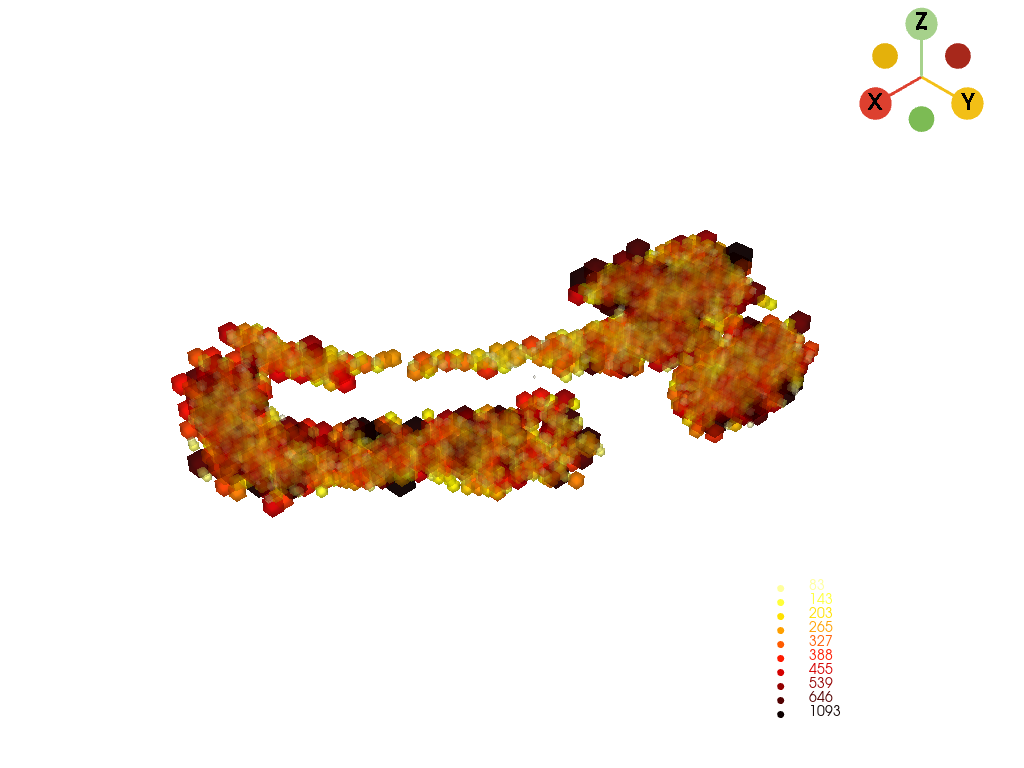

([(1704.1468490303048, 1537.276129597474, 1365.3834298789986),
  (470.95507621765137, 304.08435678482056, 132.19165706634521),
  (0.0, 0.0, 1.0)],
 array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
  

In [24]:
cube_cells_mesh = st.tl.tdr.construct_cells(pc=pc, cell_size = cell_size, geometry="cube", factor=0.5)
st.pl.three_d_plot(model=cube_cells_mesh, key="area", jupyter="static")
st.pl.three_d_plot(model=cube_cells_mesh, key="area", jupyter=False, off_screen=True,
                   filename=os.path.join(save_cellbin_tdr_image_folder, "cns_cube_cells_model.tiff"))

#### Create ellipsoid cell mesh models

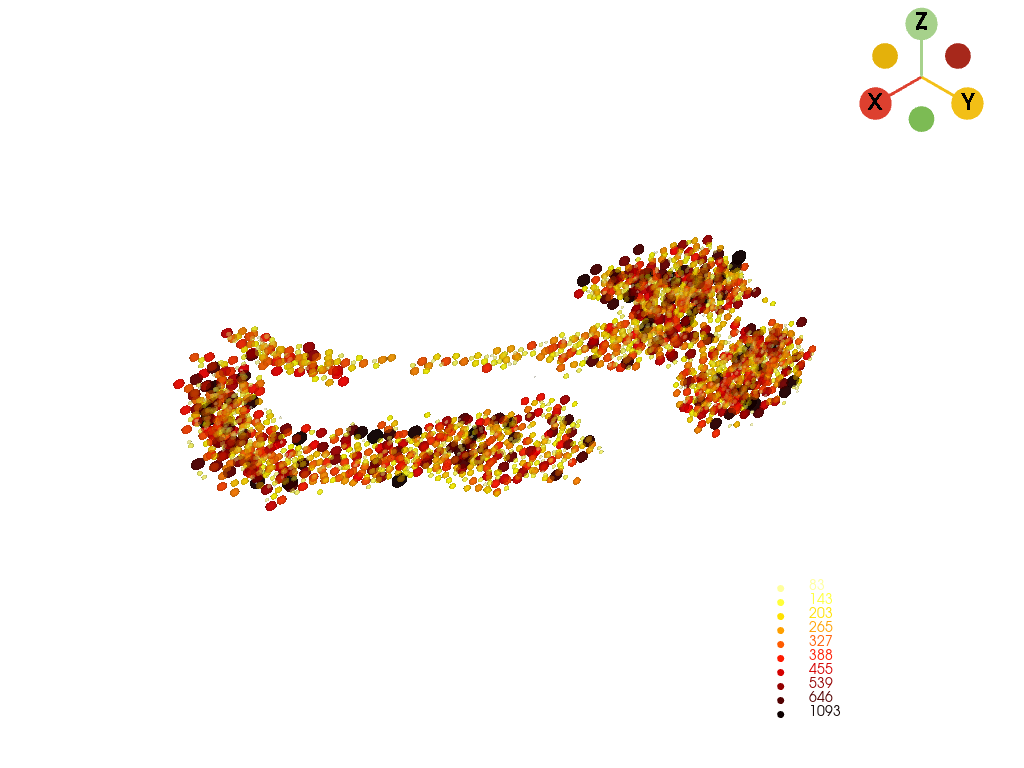

([(1694.1549168356137, 1527.6327543981747, 1355.2496920355038),
  (471.42021560668945, 304.8980531692505, 132.5149908065796),
  (0.0, 0.0, 1.0)],
 array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
   

In [26]:
ellipsoid_cells_mesh = st.tl.tdr.construct_cells(pc=pc, cell_size = cell_size, geometry="ellipsoid",
                                                 xyz_scale=(0.8, 0.5, 0.6), n_scale=(0.8, 0.8), factor=0.5)
st.pl.three_d_plot(model=ellipsoid_cells_mesh, key="area", jupyter="static")
st.pl.three_d_plot(model=ellipsoid_cells_mesh, key="area", jupyter=False, off_screen=True,
                   filename=os.path.join(save_cellbin_tdr_image_folder, "cns_ellipsoid_cells_model.tiff"))

### Construct cellular voxel model based on the mesh model

#### Create voxel model directly based on point cloud model

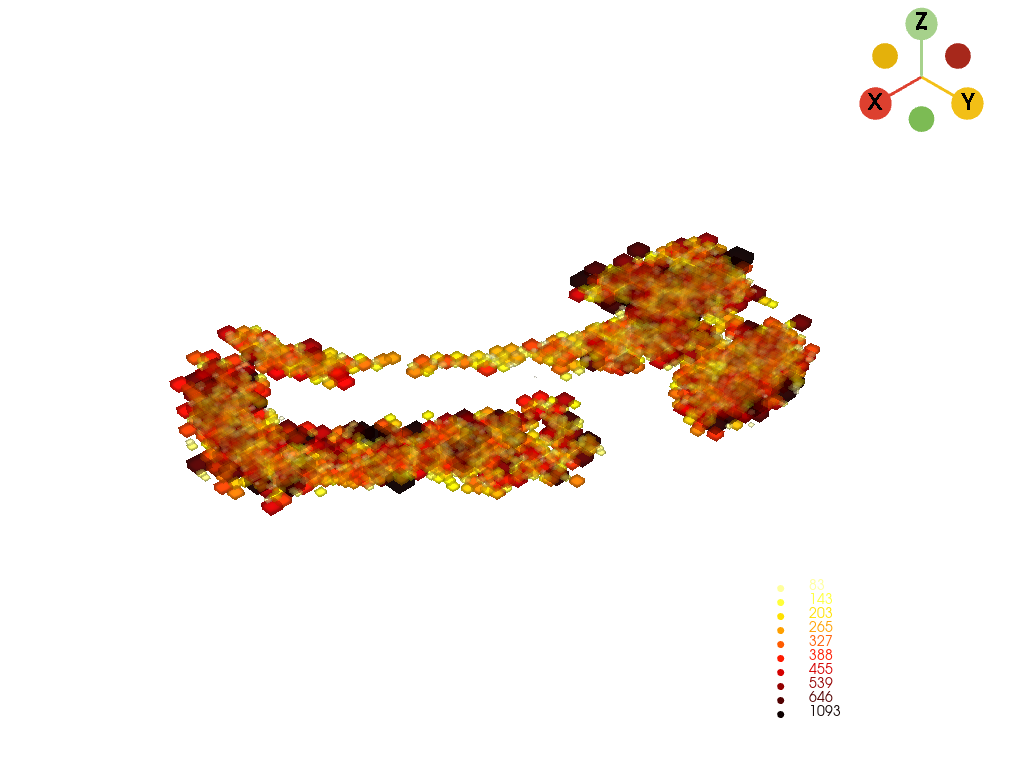

([(1698.4515593625626, 1531.4515593625626, 1360.0473898787661),
  (471.0, 304.0, 132.59583051620353),
  (0.0, 0.0, 1.0)],
 array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],


In [32]:
cell_size = cell_size.reshape(cell_size.shape[0], 1)
voxel_size = np.concatenate([cell_size, cell_size, cell_size / 2], axis=1)

voxel_cells = st.tl.tdr.voxelize_pc(pc=pc, voxel_size=voxel_size)
st.pl.three_d_plot(model=voxel_cells, key="area", jupyter="static")
st.pl.three_d_plot(model=voxel_cells, key="area", jupyter=False, off_screen=True,
                   filename=os.path.join(save_cellbin_tdr_image_folder, "cns_voxel_cells_model_1.tiff"))

#### Create voxel model based on mesh model

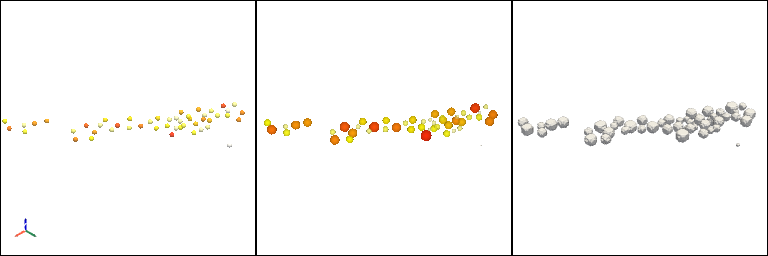

In [36]:
sub_pc = st.tl.tdr.interactive_rectangle_clip(model=pc, invert=False)[0]

sub_cell_size = pow(sub_pc.point_data["area"], 1/2)
mesh_cells = st.tl.tdr.construct_cells(pc=sub_pc, cell_size = sub_cell_size, geometry="sphere", factor=0.3)
voxel_cells = st.tl.tdr.voxelize_mesh(mesh=mesh_cells, smooth=200)

p = st.pl.create_plotter(jupyter=True, off_screen=False, window_size=(768, 256), shape=(1, 3))
p.subplot(0, 0)
st.pl.add_model(plotter=p, model=sub_pc, key="area", model_style="points", point_size=5)
p.subplot(0, 1)
st.pl.add_model(plotter=p, model=mesh_cells, key="area")
p.subplot(0, 2)
st.pl.add_model(plotter=p, model=voxel_cells, key="area")
st.pl.output_plotter(p=p, jupyter="static", filename=None)
